In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
import seaborn as sns
import numpy as np
import matplotlib.cm as cm 

# !pip install selenium
# !apt-get update
# !apt install chromium-chromedriver

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [2]:
url = 'https://lifewithbaby.co.kr/money/list'
html = requests.get(url)
bs = BeautifulSoup(html.content, "html.parser")
location = bs.find_all("td")
money = bs.find("a", {"href": "/money/1/2"})

In [3]:
location

[<td>서울 강남구</td>,
 <td><a class="link" href="/money/1/1">1,890만원</a></td>,
 <td><a class="link" href="/money/1/2">1,960만원</a></td>,
 <td>서울 강동구</td>,
 <td><a class="link" href="/money/2/1">1,880만원</a></td>,
 <td><a class="link" href="/money/2/2">1,890만원</a></td>,
 <td>서울 강북구</td>,
 <td><a class="link" href="/money/3/1">1,860만원</a></td>,
 <td><a class="link" href="/money/3/2">1,890만원</a></td>,
 <td>서울 강서구</td>,
 <td><a class="link" href="/money/4/1">1,860만원</a></td>,
 <td><a class="link" href="/money/4/2">1,890만원</a></td>,
 <td>서울 관악구</td>,
 <td><a class="link" href="/money/5/1">1,870만원</a></td>,
 <td><a class="link" href="/money/5/2">1,880만원</a></td>,
 <td>서울 광진구</td>,
 <td><a class="link" href="/money/6/1">1,870만원</a></td>,
 <td><a class="link" href="/money/6/2">1,890만원</a></td>,
 <td>서울 구로구</td>,
 <td><a class="link" href="/money/7/1">1,860만원</a></td>,
 <td><a class="link" href="/money/7/2">1,890만원</a></td>,
 <td>서울 금천구</td>,
 <td><a class="link" href="/money/8/1">1,890만원</a></td>,
 

In [4]:
location[0].text[3:]

'강남구'

In [5]:
int(location[1].text.replace(',', '').replace('만원', ''))

1890

In [6]:
first_childbirth_subsidy = {}
second_childbirth_subsidy = {}
i = 0
while(True) :
    where = location[i].text
    if(where.find('서울') == -1) :
        break
    else :
        where = str(where)[3:]
    i+=1
    first_childbirth_subsidy[where] = int(location[i].text.replace(',', '').replace('만원', '')) - 1860
    i += 1
    second_childbirth_subsidy[where] = int(location[i].text.replace(',', '').replace('만원', '')) - 1860
    i += 1
    
print(first_childbirth_subsidy)
print(second_childbirth_subsidy)

{'강남구': 30, '강동구': 20, '강북구': 0, '강서구': 0, '관악구': 10, '광진구': 10, '구로구': 0, '금천구': 30, '노원구': 0, '도봉구': 10, '동대문구': 30, '동작구': 30, '마포구': 10, '서대문구': 10, '서초구': 30, '성동구': 0, '성북구': 10, '송파구': 0, '양천구': 0, '영등포구': 10, '용산구': 50, '은평구': 10, '종로구': 30, '중구': 30, '중랑구': 10}
{'강남구': 100, '강동구': 30, '강북구': 30, '강서구': 30, '관악구': 20, '광진구': 30, '구로구': 30, '금천구': 50, '노원구': 20, '도봉구': 30, '동대문구': 60, '동작구': 50, '마포구': 50, '서대문구': 20, '서초구': 50, '성동구': 20, '성북구': 30, '송파구': 30, '양천구': 50, '영등포구': 50, '용산구': 70, '은평구': 35, '종로구': 100, '중구': 100, '중랑구': 50}


In [7]:
def add_value_label(x_list,y_list):
    for i, v in enumerate(x_list) :
        plt.text(v, y_list[i], y_list[i], fontsize=9, horizontalalignment ='center', verticalalignment = 'bottom')

In [8]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

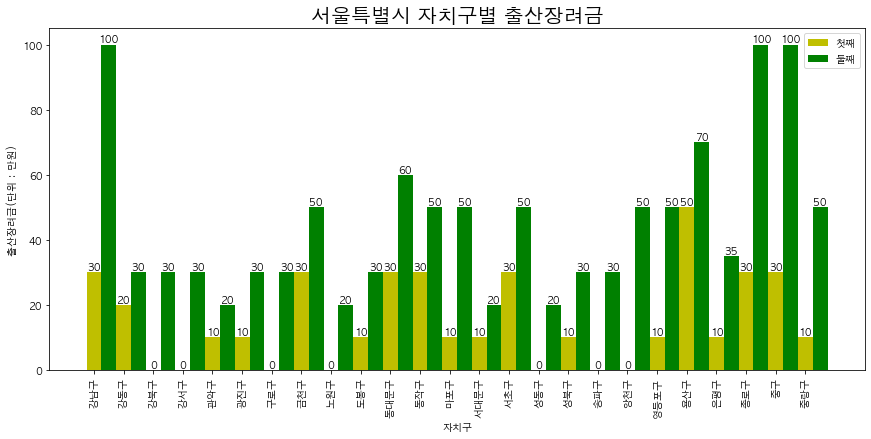

In [9]:
plt.rc('font', family='AppleGothic')
fig, ax = plt.subplots(figsize=(12,6))

first_value = list(first_childbirth_subsidy.values())
second_value = list(second_childbirth_subsidy.values())

file_name = '서울특별시 자치구별 출산장려금'
rect1 = plt.bar(np.arange(len(first_childbirth_subsidy)), first_childbirth_subsidy.values(), width=0.5, color='y', label='첫째')
autolabel(rect1)

plt.title(file_name, fontsize=20)

rect2 = plt.bar(np.arange(len(second_childbirth_subsidy))+ 0.5, second_childbirth_subsidy.values(), width=0.5, color='g', label='둘째')
autolabel(rect2)
plt.legend()
plt.xticks(np.arange(len(second_childbirth_subsidy)), first_childbirth_subsidy.keys(), rotation = 90)
plt.tight_layout()
plt.xlabel('자치구')
plt.ylabel('출산장려금(단위 : 만원)')
plt.savefig(file_name + '.png')
plt.show()

In [10]:
data = pd.read_csv('Data/출산장려금과 출산율 관계분석/2020서울특별시_합계출산율.csv', encoding='cp949')

In [11]:
data = data.drop(0)
data = data.loc[:, ['시군구별', '합계출산율']]
data.columns = ['자치구', '합계출산율']
data

,자치구,합계출산율
1,종로구,0.522
2,중구,0.688
3,용산구,0.634
4,성동구,0.783
5,광진구,0.527
6,동대문구,0.699
7,중랑구,0.660
8,성북구,0.676
9,강북구,0.550
10,도봉구,0.601


In [12]:
birth = {}
for i in range(25) :
    gu = data['자치구'][i+1]
    birth[gu] = data['합계출산율'][i+1]

In [13]:
childbirth_subsidy = []
birth_value = []
keys = []

for key in first_childbirth_subsidy.keys() :
    keys.append(key)
    birth_value.append(birth[key])
    childbirth_subsidy.append(first_childbirth_subsidy[key])

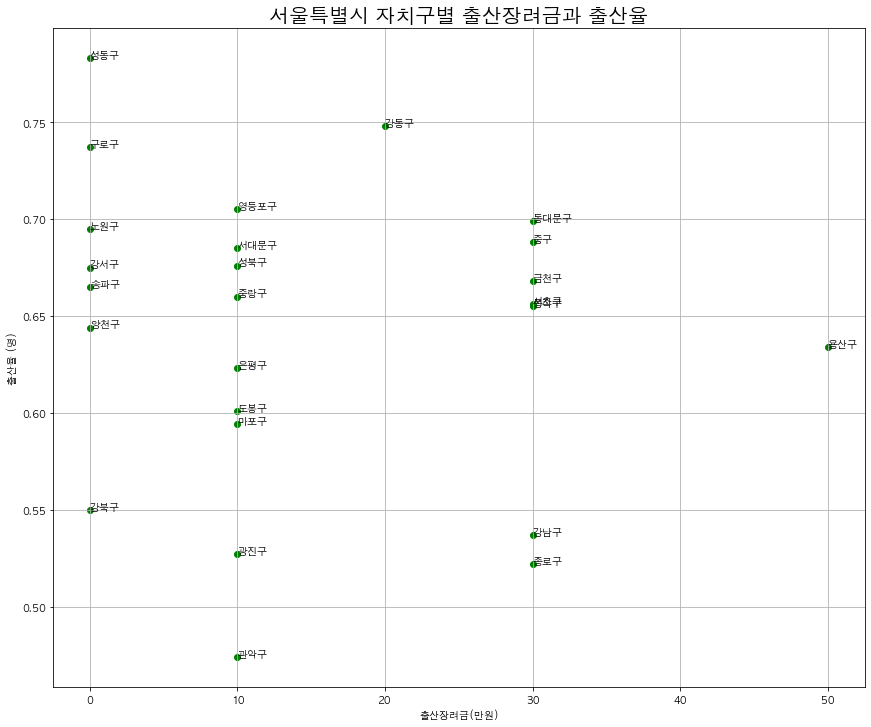

In [14]:
x =birth_value
y = childbirth_subsidy
fig, ax = plt.subplots(figsize=(12,10))

file_name = '서울특별시 자치구별 출산장려금과 출산율'
plt.title(file_name, fontsize=20)


plt.scatter(y, x, color='green')

for i, label in enumerate(keys):
    plt.text(y[i], x[i], label)

plt.grid()
plt.tight_layout()
plt.ylabel('출산율 (명)')
plt.xlabel('출산장려금(만원)')
plt.savefig(file_name + '.png')
plt.show()